In [20]:
import tensorflow as tf
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
# %matplotlib inline

# Nibabel to get data

In [21]:
# !pip install nibabel
import os
import nibabel as nib

In [22]:
native_1 = '/Users/catherinewang/cathy/despolab/atlas2/native/native_1'
data = nib.load(os.path.join(native_1, 'c0001','c0001s0004t01','forks','Output_brain_ANTS', 'r_norm_OutputBrainExtractionBrain.nii.gz'))


In [23]:
data.shape

(254, 208, 200)

In [53]:
sliced_brain_1 = data.get_data()[:127,:,:]
sliced_brain_2 = data.get_data()[127:,104:,:]

/Users/catherinewang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.
/Users/catherinewang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


(array([67.,  0.,  1.,  4.,  5.,  5.,  6., 10., 11., 18.]),
 array([-0.36100054,  0.05887792,  0.47875637,  0.89863485,  1.3185133 ,
         1.7383918 ,  2.1582701 ,  2.5781486 ,  2.998027  ,  3.4179056 ,
         3.837784  ], dtype=float32),
 <a list of 10 Patch objects>)

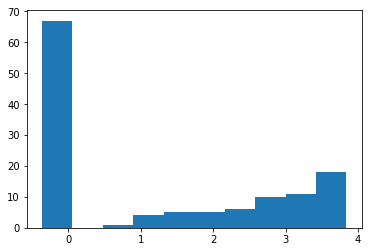

In [57]:
plt.hist(sliced_brain_1[:,100,100])

/Users/catherinewang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


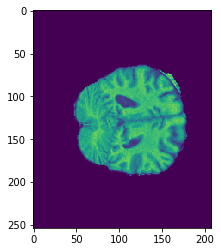

In [60]:
plt.imshow(data.get_data()[:,:,60])

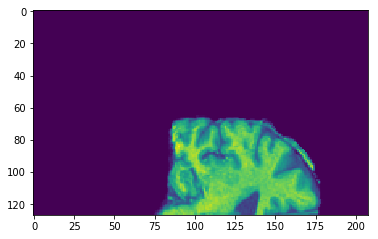

In [54]:
plt.imshow(sliced_brain_1[:,:,100])

/Users/catherinewang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


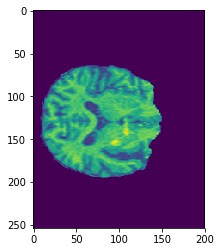

In [48]:
plt.imshow(data.get_data()[:,120,:])

In [37]:
header = data.header
print(header) 

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 254 208 200   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'6.0.1'
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -128.0678
qoffset_y       : -82.45641
qoffset_z       : -105.81357
srow_x          : [   1.     

In [8]:
import numpy as np
from nibabel.affines import apply_affine, from_matvec, to_matvec

## Earth mover

## Patch distinctness (PD)

# Nilearn

In [9]:
!pip install nilearn

     |████████████████████████████████| 2.5 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 12.7 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=2397 sha256=efc576f7f83d7e474b77b7d830558b6fe4fc4fb519f4a8889342487afcf00032
  Stored in directory: /Users/catherinewang/Library/Caches/pip/wheels/23/9d/42/5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn


In [10]:
from nilearn.plotting import view_img, glass_brain, plot_anat, plot_epi

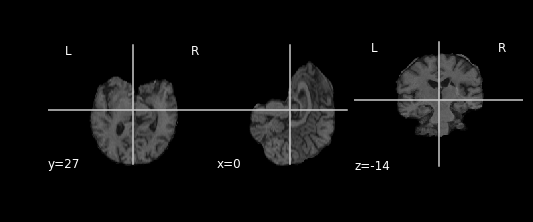

In [11]:
plot_anat(data)

/Users/catherinewang/anaconda3/lib/python3.6/site-packages/nilearn/plotting/html_stat_map.py:83: UserWarning: Threshold given was 1e-06, but the data has no values below -0.36100053787231445. 
  data.min()))



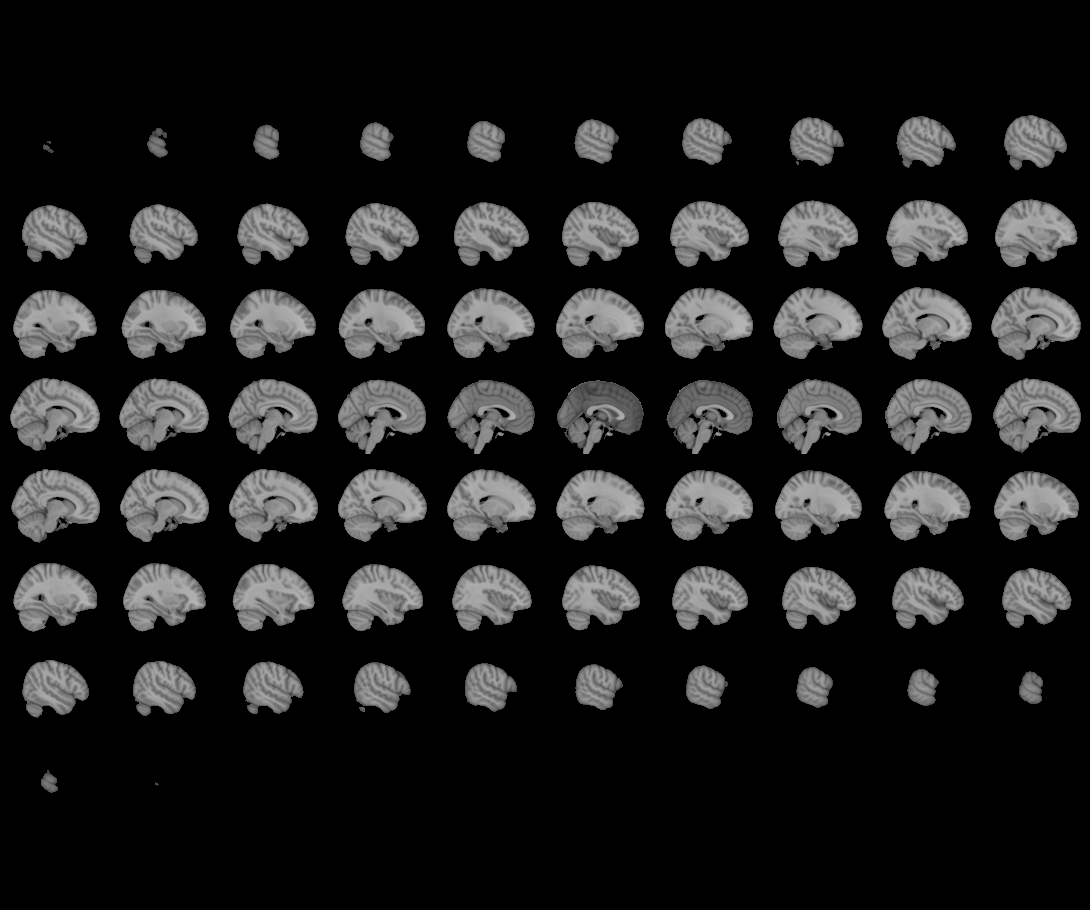
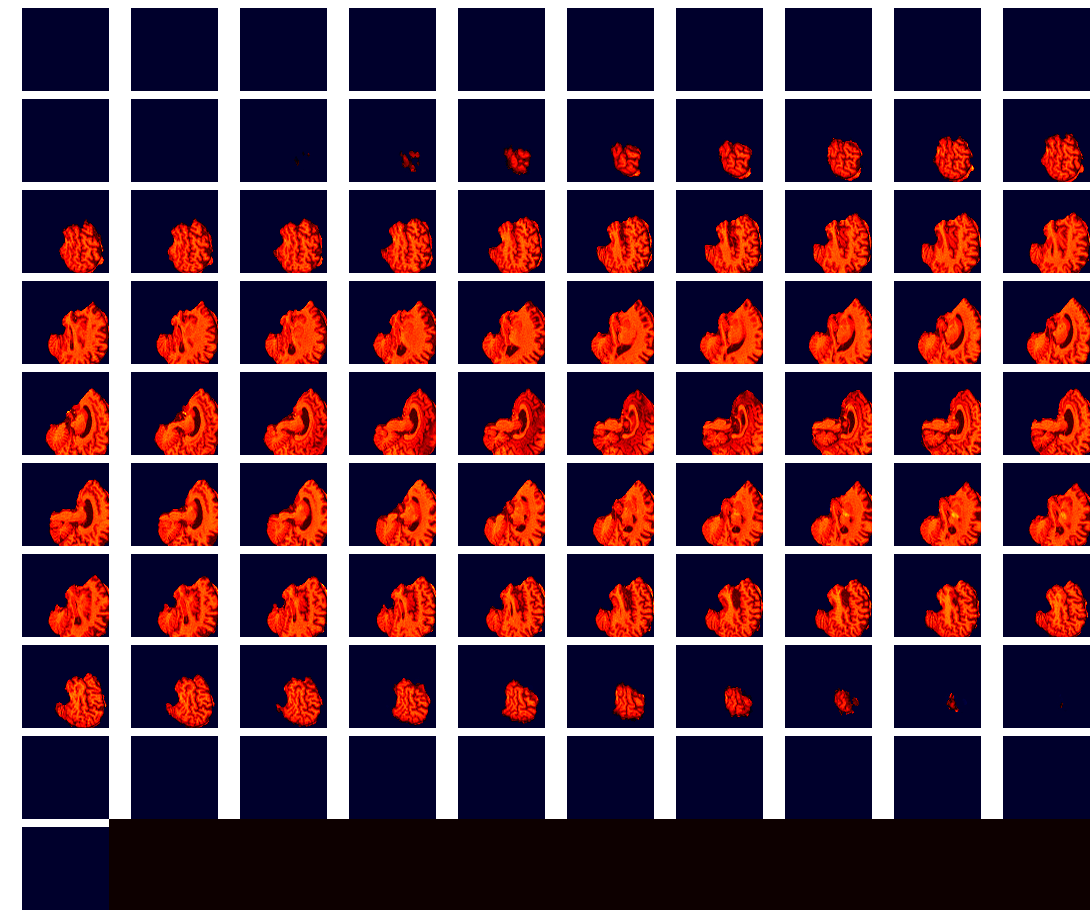

In [12]:
view_img(data)


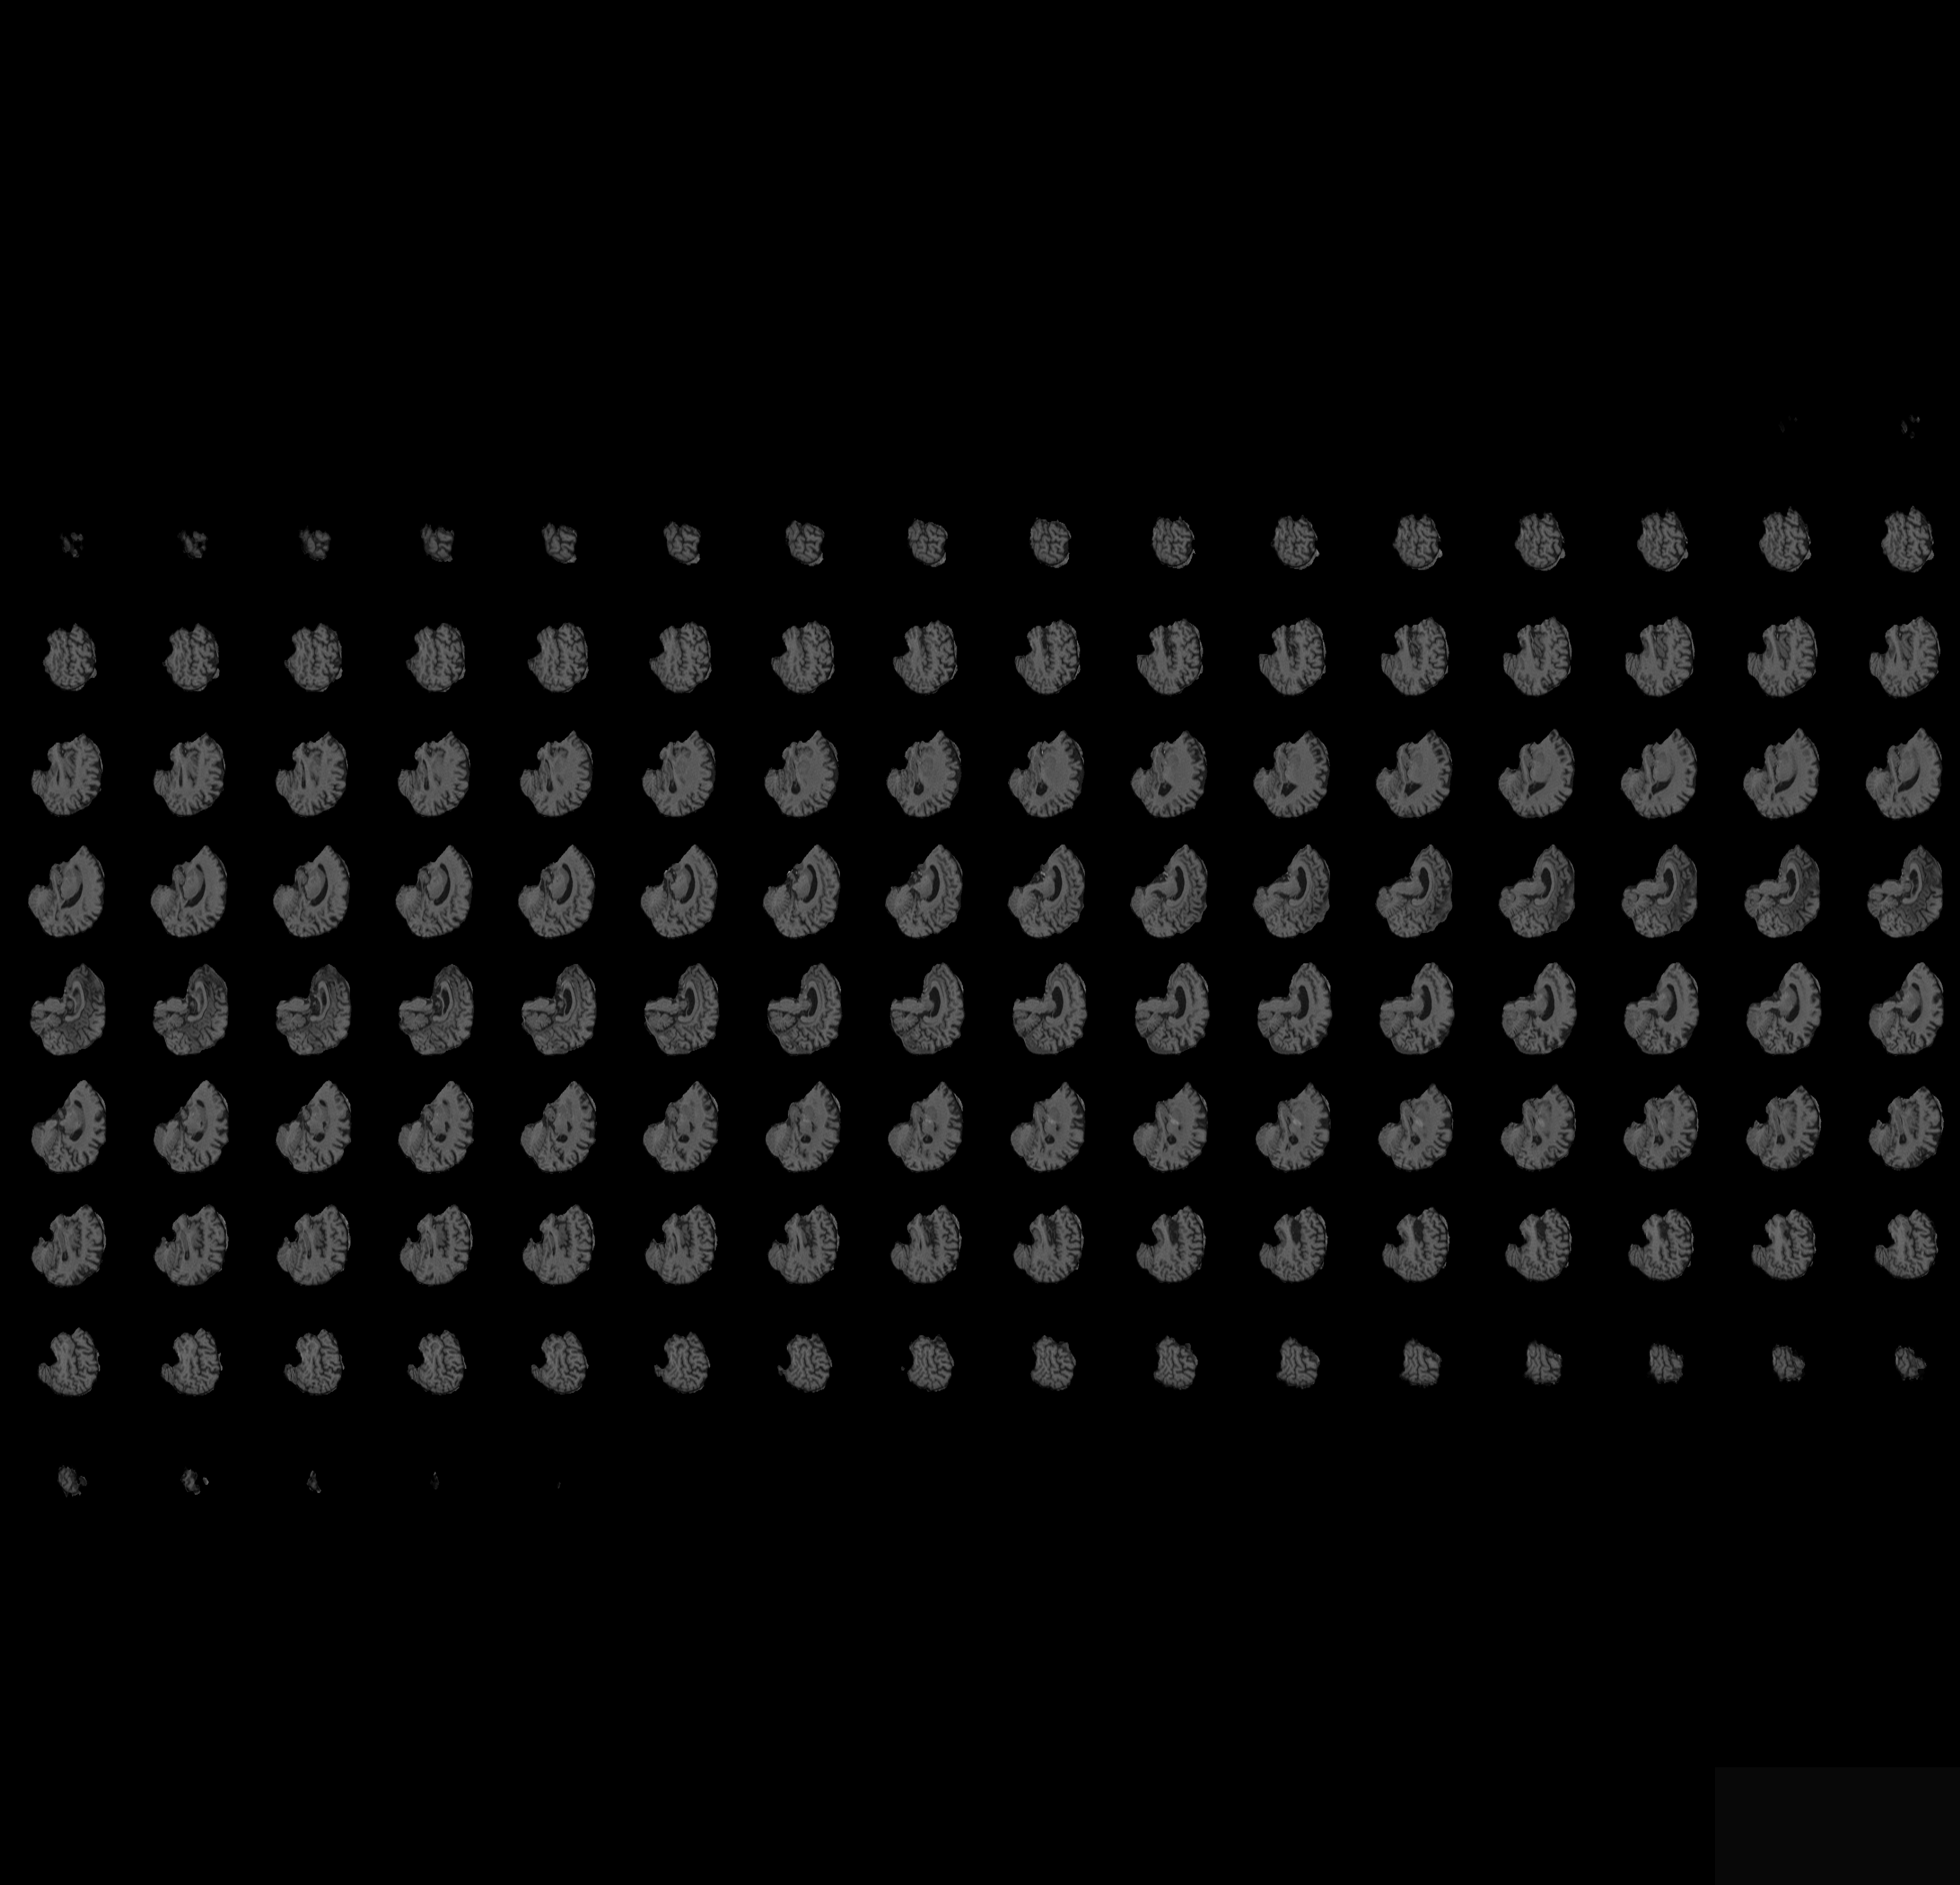
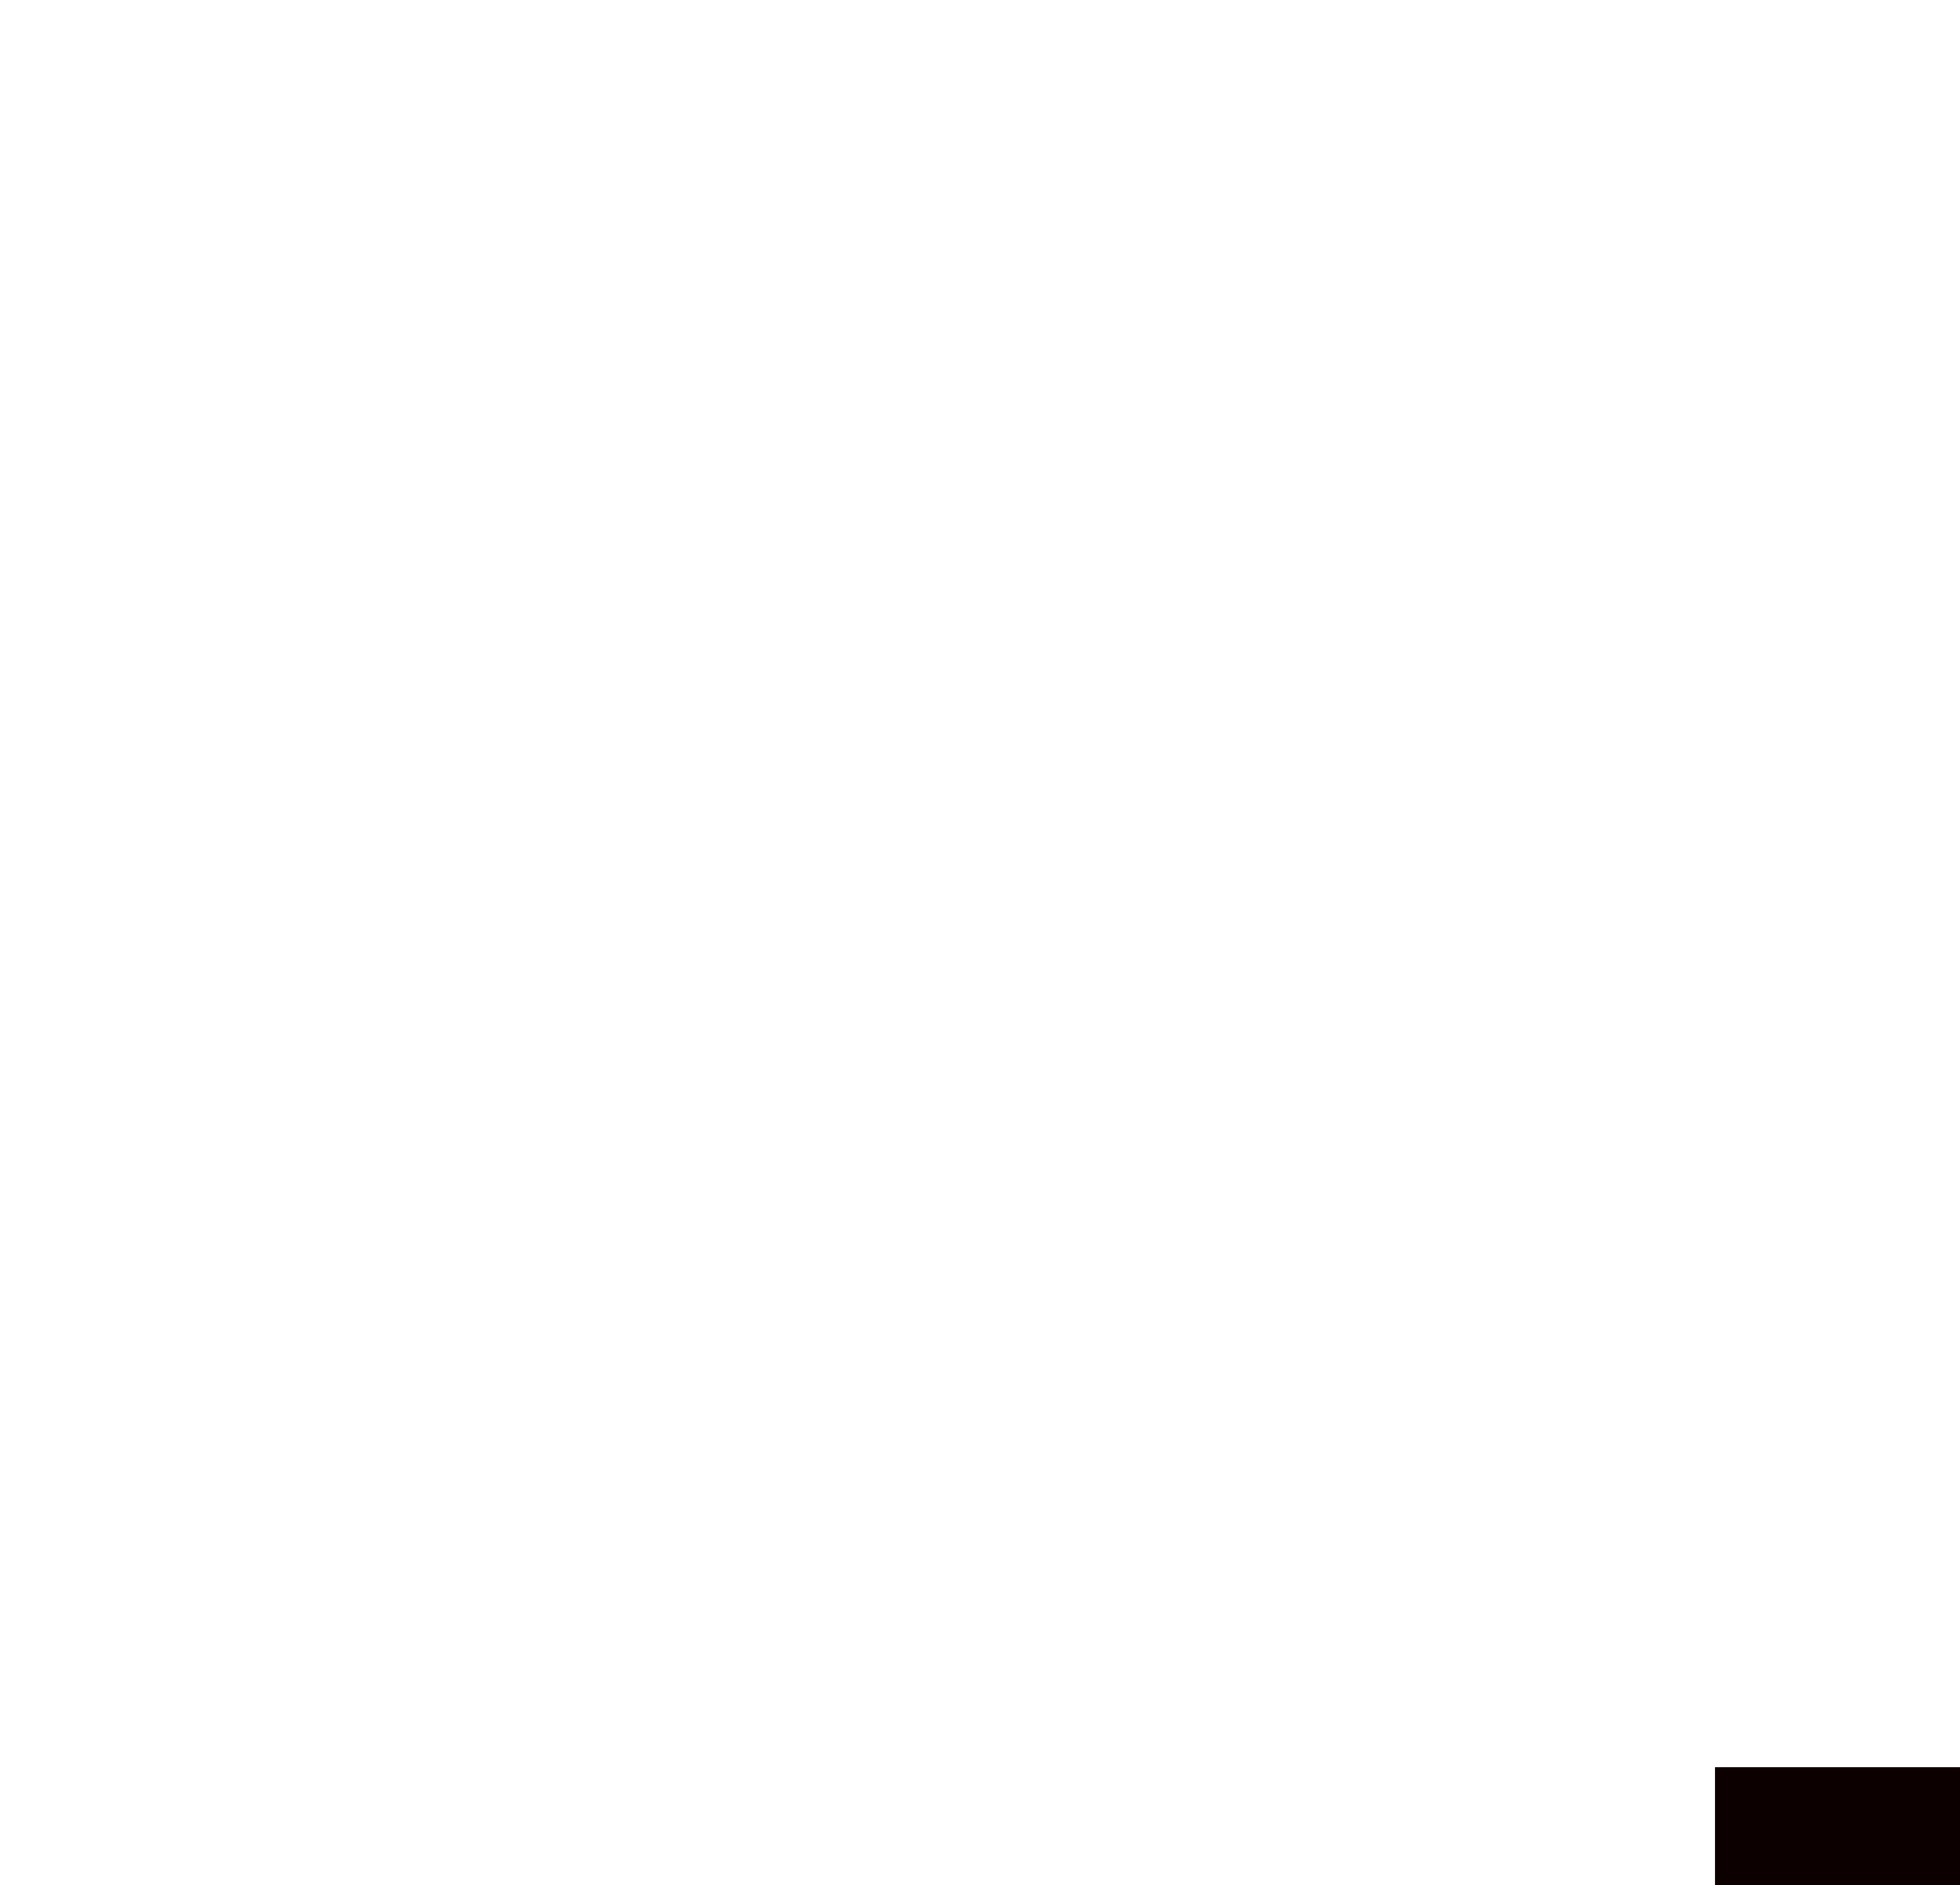

In [13]:
amygdala_mask = nib.load(os.path.join(native_1, 'c0001','c0001s0004t01','bin_r_c0001s0004t01_mask.nii.gz'))

view_img(amygdala_mask, data)

# Brain_Data

In [16]:
!pip install nltools
import nltools
from nltools.data import Brain_Data
from nltools.utils import get_anatomical

a = Brain_Data(get_anatomical())

     |████████████████████████████████| 3.3 MB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 176 kB 6.8 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 8.1 MB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 2.6 MB/s eta 0:00:01     |███████████████████████         | 5.2 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 7.5 MB/s  eta 0:00:01
  Created wheel for pynv: filename=pynv-0.1.1-py3-none-any.whl size=3757 sha256=8bde27aab93d4124c582635406ce16e17284ce8958e9328c0cf7d4673aec755d
  Stored in directory: /Users/catherinewang/Library/Caches/pip/wheels/70/24/77/d1abade68f767c352186d5c4dfd5b5e466a93e8b9d045443d7
Successfully built pynv
  Attempting uninstall: joblib
    Found existing installation: joblib 0.14.1
    Uninstalling joblib-0.14.1:
      Successfully uninstalled joblib-0.14.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 2.0.2
    Uninstalling matplotlib-2.0.2:
      Successfully

ImportError: cannot import name '_print_elapsed_time'